<font color='black'><font size="4">Notebook nettoyage des données --Le plan de ce notebook (Projet 4) est le suivant:</font></font>
<font color='black'><font size="3">
* Lire les fichiers csv et les présenter sous forme des DataFrames
* Nettoyer les DataFrames des valeurs aberrantes
* Filtrer le DataFrame en gardant les variables pertinentes -- corrMatrix
* One-Hot-encoded
* Transformation normale
</font></font>    

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as pl
pl.rcParams.update({'font.size': 14})
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics

## A) Lire les fichiers csv et le présenter sous forme du DataFrame

In [2]:
data_2015 = pd.read_csv("2015-building-energy-benchmarking.csv",sep=",")
data_2016 = pd.read_csv("2016-building-energy-benchmarking.csv",sep=",")

## B) Nettoyer les DataFrames des valeurs aberrantes

<font color='darkblue'><font size="3">
Energy Star Score est une note de 1 à 100 calculée par l'EPA, qui évalue la performance énergétique globale d'un bien immobilier. Nous voulons donc vérifier si les valeurs du score Energy Star sont supérieures à 100 ou inférieures à 0 dans les deux bases de données.
</font></font>

In [3]:
data_2015[(data_2015['ENERGYSTARScore']>100) & (data_2015['ENERGYSTARScore']<0)]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes


In [4]:
data_2016[(data_2016['ENERGYSTARScore']>100) & (data_2016['ENERGYSTARScore']<0)]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity


<font color='darkblue'><font size="3">
Parfait, nous n'avons pas de valeurs aberrantes au niveau du score Energy Star.
</font></font>

<font color='darkblue'><font size="3">
Maintenant, nous allons vérifier si les valeurs de la consommation d'électricité, de gaz sont toutes positives, dans le cas où nous trouvons des valeurs négatives, nous les supprimons.
</font></font>

In [5]:
(data_2015.iloc[:,29:38] < 0).values.any()

False

In [6]:
(data_2016.iloc[:,29:40] <0).values.any() ## Oups, nous avons des valeurs négatives

True

In [7]:
np.where(data_2016.iloc[:,29:40] <0) 
## np.where pour chercher où sont ces valeurs négatives => nous avons juste un seul cas : ligne = 3206 

(array([3206, 3206, 3206], dtype=int64), array([3, 7, 8], dtype=int64))

<font color='darkblue'><font size="3">
Nous allons vérifier manuellement le cas spécifique du ligne = 3206. L'array([3, 7, 8] présente où il y a des valeurs négatives (qui sont tout pour la ligne 3206)
</font></font>

In [8]:
data_2016.iloc[3206] 

OSEBuildingID                                            49784
DataYear                                                  2016
BuildingType                                    NonResidential
PrimaryPropertyType                Small- and Mid-Sized Office
PropertyName                                    Bullitt Center
Address                                    1501 E. Madison St.
City                                                   Seattle
State                                                       WA
ZipCode                                                  98122
TaxParcelIdentificationNumber                       7234600195
CouncilDistrictCode                                          3
Neighborhood                                           CENTRAL
Latitude                                               47.6143
Longitude                                             -122.313
YearBuilt                                                 2013
NumberofBuildings                                      

In [9]:
data_2016.drop([3206], inplace= True) ## supprimer cette ligne qui contient des valeurs négatives au niveau du consomation

<font color='darkblue'><font size="3">
Une étape très importante maintenant est de vérifier si nous avons des valeurs dupliquées.
</font></font>

In [10]:
data_2015.duplicated().any() 
## duplicated() pour vérifier les valeurs dupliquées, 
## any() renvoie True si un élément d'un itérable est True, sinon il retourne False.

False

In [11]:
data_2016.duplicated().any()

False

<font color='darkblue'><font size="3">
Parfait!\
Maintenant, nous avons deux DataFrames nettoyés, prêts à être utilisés. 
</font></font>

## C) Filtrer le DataFrame en gardant les variables pertinentes -- corrMatrix

<font color='darkblue'><font size="3">
Avant de filtrer nos DataFrames, nous allons analyser certaines des caractéristiques les plus importantes dont nous disposons:\
**Energy Star Score** et **Total Greenhouse Gas Emissions**
</font></font>

### C-1) Energy Star Score
<font color='darkblue'><font size="3">
Le score ENERGY STAR donne un aperçu complet de la performance énergétique des bâtiments. Il est exprimé sur une échelle de 1 à 100, où plus le score est élevé, meilleure est la performance énergétique du bâtiment. 

Un score de **50 correspond à la médiane**. Plus bas, c'est plus mauvais que la moyenne; plus haut, c'est meilleur.
    
Dans ce qui suit, nous attribuons à chaque score son niveau :  **mauvais, médiane, EnergyStar**.
Et dans le cas où nous avons Nan, nous les attribuons à **vide**.    
</font></font>

In [12]:
data_2015_c = pd.DataFrame(data_2015['ENERGYSTARScore'].fillna(-1))
data_2016_c = pd.DataFrame(data_2016['ENERGYSTARScore'].fillna(-1))

bins = [-2,0,49,51,100] 
labels = ['Vide','Mauvais','Médiane','EnergyStar']
color= ['lightgrey','red', 'yellowgreen', 'lightblue']

divid_energystar_2015 = pd.cut(data_2015_c.ENERGYSTARScore, bins,labels=labels)
divid_energystar_2016 = pd.cut(data_2016_c.ENERGYSTARScore, bins,labels=labels)

new_data_2015 = pd.DataFrame(divid_energystar_2015)
new_data_2016 = pd.DataFrame(divid_energystar_2016)


values_count_enerdystar_2015 = pd.value_counts(new_data_2015["ENERGYSTARScore"]).loc[['Vide','Mauvais','Médiane','EnergyStar']]
values_count_enerdystar_2016 = pd.value_counts(new_data_2016["ENERGYSTARScore"]).loc[['Vide','Mauvais','Médiane','EnergyStar']]

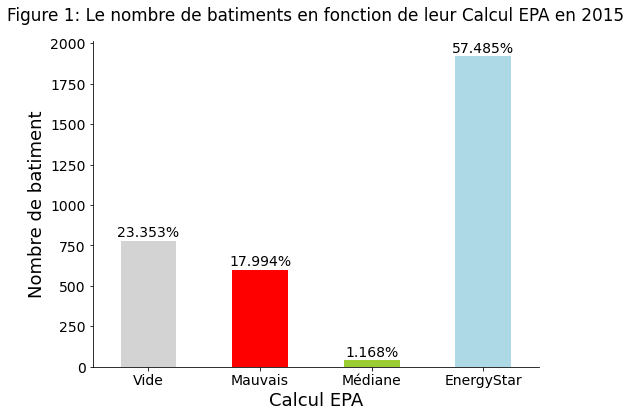

In [13]:
pl.figure(figsize=(8,6))
ax = values_count_enerdystar_2015.plot.bar(rot=0,color=color)
ax.set_ylabel('Nombre de batiment',fontdict={'fontsize':18})
ax.set_xlabel('Calcul EPA',fontdict={'fontsize':18})
ax.set_title('Figure 1: Le nombre de batiments en fonction de leur Calcul EPA en 2015',pad=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

total_2015 = len(divid_energystar_2015)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total_2015:.3f}%\n'
   # percent = np.append(percent, np.round(100 * p.get_height() / total,4))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
pl.show()

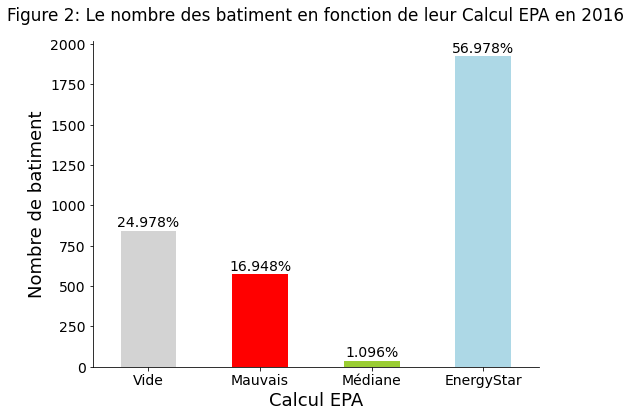

In [14]:
pl.figure(figsize=(8,6))

ax = values_count_enerdystar_2016.plot.bar(rot=0,color=color)
ax.set_ylabel('Nombre de batiment',fontdict={'fontsize':18})
ax.set_xlabel('Calcul EPA',fontdict={'fontsize':18})
ax.set_title('Figure 2: Le nombre des batiment en fonction de leur Calcul EPA en 2016',pad=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

total_2016 = len(divid_energystar_2016)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total_2016:.3f}%\n'
   # percent = np.append(percent, np.round(100 * p.get_height() / total,4))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
pl.show()

<font color='darkblue'><font size="3">
Nous avons trouvé que 25 % des valeurs de la note Energy Star sont vides. Nous avons donc deux solutions : soit nous supprimons toutes ces valeurs manquantes, soit nous les imputons. Dans cette étude, et afin de ne pas biaiser les méthodes de prédiction, nous supprimerons les valeurs manquantes.
</font></font>

### C-2) Total Greenhouse Gas Emissions

<font color='darkblue'><font size="3">
La quantité totale d'émissions de gaz à effet de serre, y compris le dioxyde de carbone, le méthane et l'oxyde nitreux, rejetés dans l'atmosphère en raison de la consommation d'énergie du bien (en Kg CO2e), divisée par la superficie brute du bien (pied carré).\
Dans ce qui suit, nous présenterons l'émission totale de CO2 pour les années 2015 et 2016.
</font></font>    

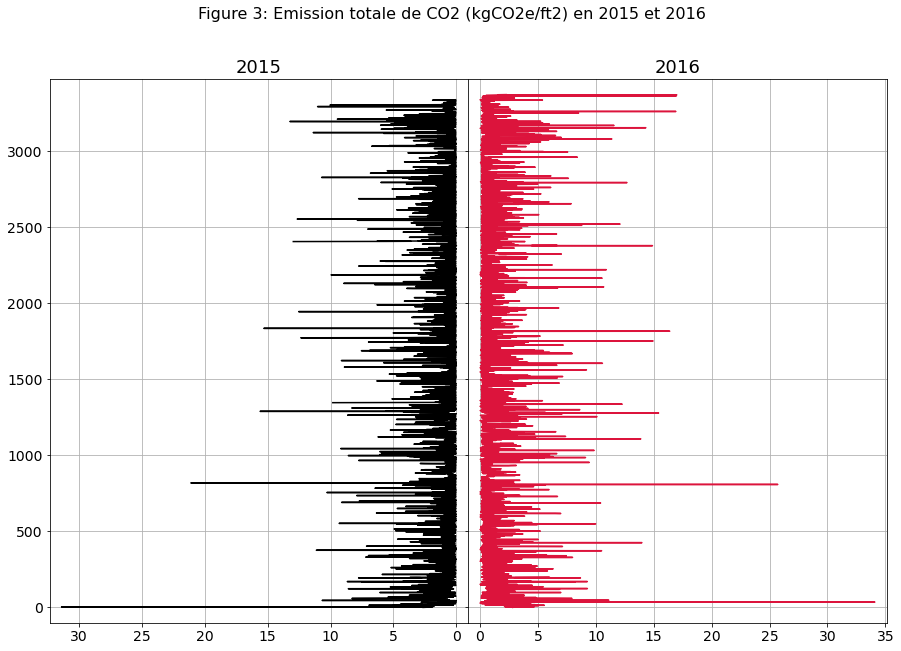

In [15]:
fig, axes = pl.subplots(ncols=2, sharey=True, gridspec_kw={'wspace': 0},figsize=(15,10))
fig.suptitle("Figure 3: Emission totale de CO2 (kgCO2e/ft2) en 2015 et 2016 ", fontsize=16)
axes[0].plot(data_2015['GHGEmissionsIntensity(kgCO2e/ft2)'],range(len(data_2015['GHGEmissionsIntensity(kgCO2e/ft2)'])), color='black',label='2015')
axes[1].plot(data_2016['GHGEmissionsIntensity'],range(len(data_2016['GHGEmissionsIntensity'])),color='crimson',label='2016')

axes[0].invert_xaxis()
axes[1].set_title('2016',fontsize=18)
axes[0].set_title('2015',fontsize=18)
for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)


<font color='darkblue'><font size="3">
Puis nous cherchons s'il y a des valeurs manquantes dans ses données.
</font></font>

In [16]:
nan_2015 = data_2015['GHGEmissionsIntensity(kgCO2e/ft2)'].isna().sum()
nan_2016 = data_2016['GHGEmissionsIntensity'].isna().sum()
print("{} valeurs NaN dans le DataFrame de 2015 et {} dans celle de 2016".format(nan_2015, nan_2016))
per_nan_2015 = 100*nan_2015/data_2015.shape[0]
per_nan_2016 = 100*nan_2016/data_2015.shape[0]
print("\n{}% des valeurs Nan dans le dataframe 2015 et {}% dans celle de 2016"\
      .format(np.round(per_nan_2015,3), np.round(per_nan_2016,3)))

10 valeurs NaN dans le DataFrame de 2015 et 9 dans celle de 2016

0.299% des valeurs Nan dans le dataframe 2015 et 0.269% dans celle de 2016


<font color='darkblue'><font size="3">
le pourcentage de données manquantes dans les colonnes de Total Greenhouse Gas Emissions n'est pas important, nous supprimerons ses lignes 
</font></font>

In [17]:
df_no_missing_2015 = data_2015.dropna(subset=['GHGEmissionsIntensity(kgCO2e/ft2)'])
df_no_missing_2016 = data_2016.dropna(subset=['GHGEmissionsIntensity'])

<font color='darkblue'><font size="3">
**Nous avons décidé, dans le processus suivant, de ne choisir qu'un seul DataFrame pour traiter, et nous avons choisi 2016 parce qu'il est plus récent.**
</font></font>

In [18]:
## les valeurs Nan dans le Dataframe 2016
df_no_missing_2016.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             0
LargestPropertyUseType               11
LargestPropertyUseTypeGFA            11
SecondLargestPropertyUseType       1687
SecondLargestPropertyUseTypeGFA    1687


### C-3) Variables pertinentes

<font color='darkblue'><font size="3">
Nous avons sélectionné nos variables pertinentes grâce à la corrMatrix pour identifier les variables corrélées entre elles
</font></font>

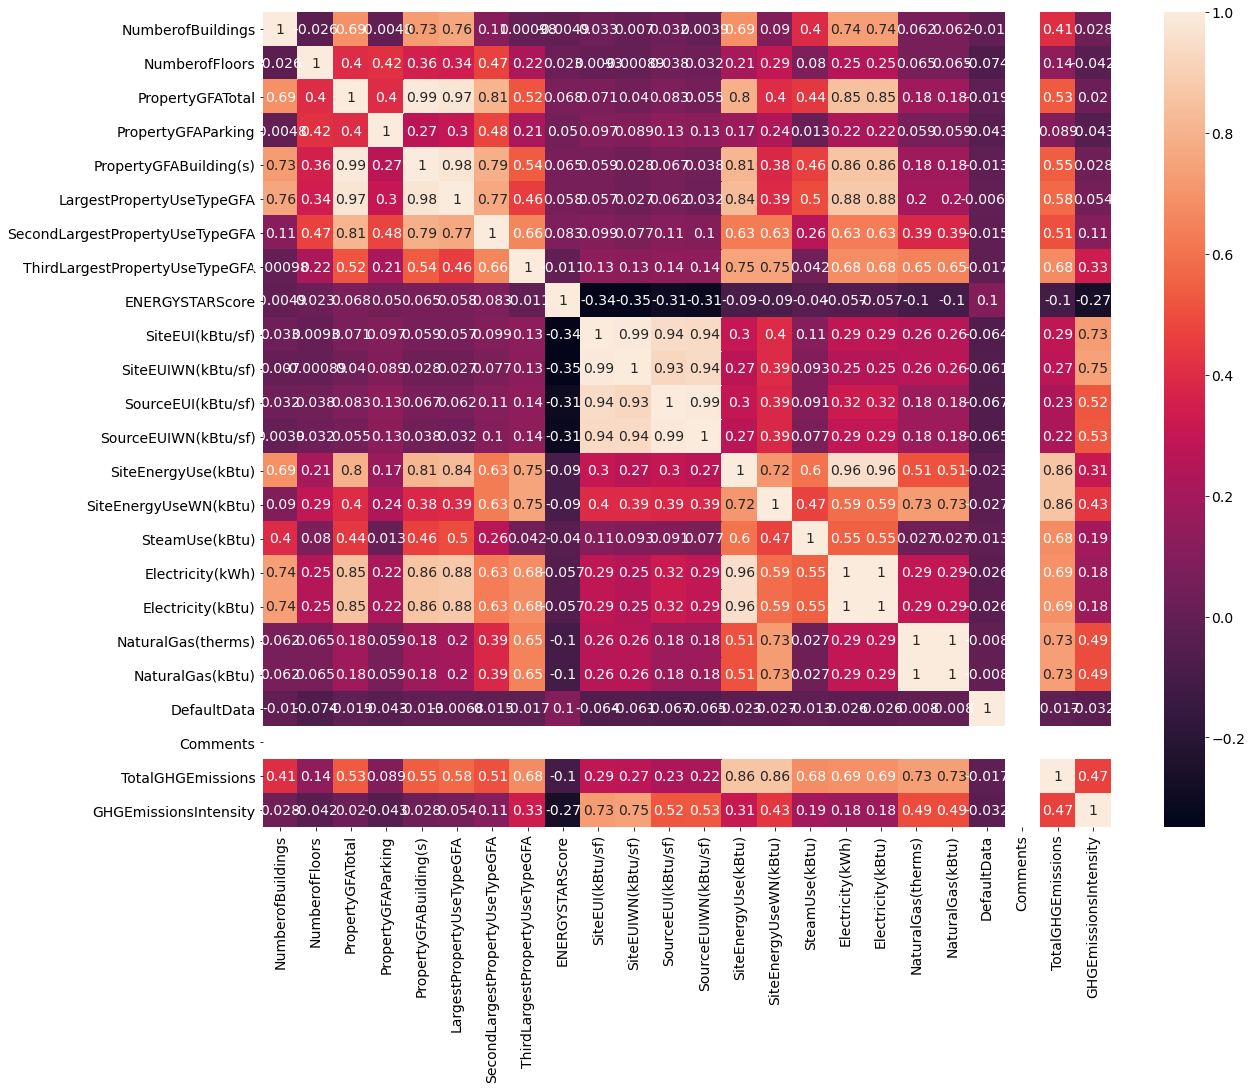

In [19]:
import seaborn as sn
df_num_2016 = df_no_missing_2016.select_dtypes(exclude=[np.object])
pl.figure(figsize=(19, 15))
corrMatrix = df_num_2016.iloc[:, 7:].corr()
#corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)

In [20]:
df_filter_2016 = df_no_missing_2016.filter(items=['BuildingType',
                                                 'YearBuilt',
                                                 'NumberofBuildings',
                                                 'NumberofFloors',
                                                 'PropertyGFATotal',
                                                'PropertyGFAParking' ,
                                                 'PropertyGFABuilding(s)',
                                                 'ENERGYSTARScore',
                                                  'SourceEUI(kBtu/sf)', 
                                                  'SiteEnergyUse(kBtu)',
                                                  'NaturalGas(kBtu)', 
                                                  'TotalGHGEmissions'])

In [21]:
## les valeurs Nan dans le nouveau Dataframe 2016
df_filter_2016.isna().sum()

BuildingType                0
YearBuilt                   0
NumberofBuildings           0
NumberofFloors              0
PropertyGFATotal            0
PropertyGFAParking          0
PropertyGFABuilding(s)      0
ENERGYSTARScore           834
SourceEUI(kBtu/sf)          0
SiteEnergyUse(kBtu)         0
NaturalGas(kBtu)            0
TotalGHGEmissions           0
dtype: int64

<font color='darkblue'><font size="3">
Afin de répondre a l'un des objectives de ce projet là: importance du Energy Star Score, nous créons deux dataframes, l'un qui contient la colonne Score Energy Star et l'autre sans.
</font></font>

In [22]:
df_with_ESS = df_filter_2016.dropna()
df_without_ESS = df_with_ESS.drop(columns=['ENERGYSTARScore']) ## drop all Nan values and the column ESS,
                                                               ## to end up with the same data

## D) One Hot encoded

In [23]:
df_with_ESS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2532 entries, 0 to 3371
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BuildingType            2532 non-null   object 
 1   YearBuilt               2532 non-null   int64  
 2   NumberofBuildings       2532 non-null   float64
 3   NumberofFloors          2532 non-null   int64  
 4   PropertyGFATotal        2532 non-null   int64  
 5   PropertyGFAParking      2532 non-null   int64  
 6   PropertyGFABuilding(s)  2532 non-null   int64  
 7   ENERGYSTARScore         2532 non-null   float64
 8   SourceEUI(kBtu/sf)      2532 non-null   float64
 9   SiteEnergyUse(kBtu)     2532 non-null   float64
 10  NaturalGas(kBtu)        2532 non-null   float64
 11  TotalGHGEmissions       2532 non-null   float64
dtypes: float64(6), int64(5), object(1)
memory usage: 257.2+ KB


In [24]:
## one Hot encoded est utilisé dans le cas où nous avons des colonne de classification comme celle du type du Batiment
df_encoded_with_ESS = pd.get_dummies(df_with_ESS,columns=['BuildingType'])
df_encoded_without_ESS = pd.get_dummies(df_without_ESS, columns=['BuildingType'])

## E) Transformation normale

Text(0.5, 1.05, 'Figure 4: Transformation sur le variable SiteEnergyeUse')

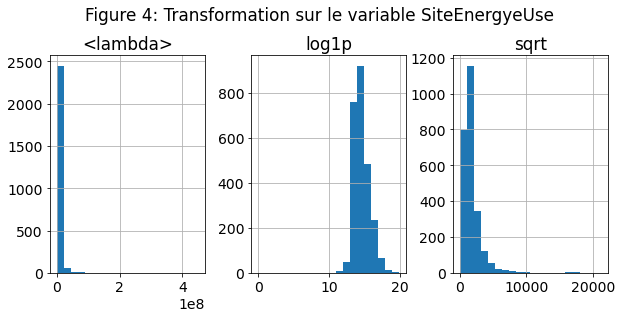

In [30]:
## 
essaie_Energie = df_with_ESS['SiteEnergyUse(kBtu)'].transform([np.sqrt, np.log1p, lambda x:x])
essaie_Energie.hist(bins=20, figsize=(10,4), layout=(1,3))
pl.suptitle("Figure 4: Transformation sur le variable SiteEnergyeUse",x=0.5, y=1.05, ha='center')

Text(0.5, 1.05, 'Figure 5: Transformation sur le variable émission du CO2')

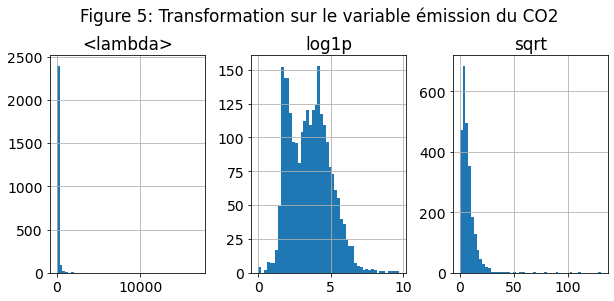

In [31]:
essaie_Energie = df_with_ESS['TotalGHGEmissions'].transform([np.sqrt, np.log1p, lambda x:x])
essaie_Energie.hist(bins=50, figsize=(10,4), layout=(1,3))
pl.suptitle("Figure 5: Transformation sur le variable émission du CO2",x=0.5, y=1.05, ha='center')

In [27]:
df_encoded_with_ESS['SiteEnergyUse(kBtu)'] = df_encoded_with_ESS['SiteEnergyUse(kBtu)'].transform(np.log1p)
df_encoded_with_ESS['TotalGHGEmissions'] = df_encoded_with_ESS['TotalGHGEmissions'].transform(np.log1p)

In [28]:
df_encoded_without_ESS['SiteEnergyUse(kBtu)'] = df_encoded_without_ESS['SiteEnergyUse(kBtu)'].transform(np.log1p)
df_encoded_without_ESS['TotalGHGEmissions'] = df_encoded_without_ESS['TotalGHGEmissions'].transform(np.log1p)

In [29]:
df_encoded_with_ESS.to_csv("df_encoded_with_ESS.csv",index=False)

df_encoded_without_ESS.to_csv("df_encoded_without_ESS.csv",index=False)

<font color='darkblue'><font size="4">
Donc maintenant nous avons deux dataframes propres et clairs.
Nous nous retrouverons dans le deuxième Notebook où je testerai certaines méthodes de régression afin de prédire l'émission de CO2 et la consommation d'énergie totale du Seattle. 
</font></font>